In [1]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
def get_features(ip):
    model = VGG19(weights='imagenet', include_top=False)
    img = image.load_img(ip, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

In [9]:
images = [x for x in glob('/Users/hamnamoieez/Desktop/Projects/FitMe/dataset/*')]
print(images)


['/Users/hamnamoieez/Desktop/Projects/FitMe/dataset/test.png', '/Users/hamnamoieez/Desktop/Projects/FitMe/dataset/base.jpg', '/Users/hamnamoieez/Desktop/Projects/FitMe/dataset/base2.jpg']


In [4]:
test_features = get_features(images[0])
base1_features = get_features(images[1])
base2_features = get_features(images[2])

In [8]:
print(images[0])

../dataset/test.png


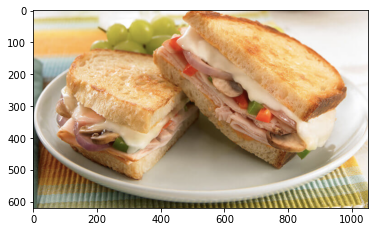

In [18]:
plt.imshow(cv2.cvtColor(cv2.imread(images[0]), cv2.COLOR_BGR2RGB))
plt.show()

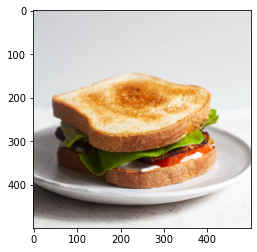

In [16]:
plt.imshow(cv2.cvtColor(cv2.imread(images[1]), cv2.COLOR_BGR2RGB))
plt.show()

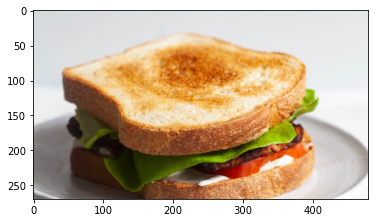

In [17]:
plt.imshow(cv2.cvtColor(cv2.imread(images[2]), cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
base1_features.shape
check = np.reshape(base1_features, (-1, 1))
check.shape


(25088, 1)

In [29]:
from sklearn.metrics.pairwise import euclidean_distances as dist

dist1 = dist(np.reshape(base1_features, (-1, 1)), np.reshape(test_features, (-1, 1)))
# dist2 = dist(np.reshape(base2_features, (-1, 1)), np.reshape(test_features, (-1, 1)))
dist3 = dist(np.reshape(base1_features, (-1, 1)), np.reshape(base2_features, (-1, 1)))

In [31]:
print(dist1.mean())

5.150604


In [32]:
print(dist3.mean())

4.7736993


In [33]:
# dist2 = dist(np.reshape(base2_features, (-1, 1)), np.reshape(test_features, (-1, 1)))
# print(dist2.mean())

5.8429933


In [ ]:
(dist1-dist3)